# Disease Models 1/23/2021

The SIR model was first coined by W.O Kermack and A.G. McKendrick in their work A Contribution to the Mathematical [Theory of Epidemics](https://royalsocietypublishing.org/doi/pdf/10.1098/rspa.1927.0118) written in 1927. While the basic model itself does not get used often in research, it provides a foundation for the more elaborite models used by researchers to better represent disease spread behavior. These models are constructed using Euler's method for solving differential equations. It should be mentioned that the model mentioned in our first meeting by Dr. Dragnev was the [SI Model](https://docs.idmod.org/projects/emod-hiv/en/latest/model-si.html). 

COVID-19 General Data:  
* $R_{0} \approx 1.5$ [PMC](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7438206/#:~:text=We%20find%20that%20the%20basic%20reproductive%20number%20is%20between%201.0011,2.7936%20for%20the%20greatest%20value) *This varies +/- 1, but it is in the correct range*
* $\gamma \approx 1/9$ days [CIDRAP](https://www.cidrap.umn.edu/news-perspective/2020/11/covid-19-most-contagious-first-5-days-illness-study-finds)
* $\sigma \approx 5$ days [CDC](https://www.cdc.gov/flu/symptoms/flu-vs-covid19.htm)
* $N \approx 3.3(10)^{8}$ [Census](https://www.census.gov/popclock/)
* $\nu = \mu \approx 0.0073$ [CDC](https://www.cdc.gov/nchs/data/databriefs/db355-h.pdf)

## SIR(S) Model
*Equations and concepts come from [MAA](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-introduction). Additional help with understanding these topics was provided by videos made by [Brian Sullivan](https://youtu.be/vL6NfB7BKeY)*

SIR represents a system of 1st order differential equations used to model the behavior of the disease at a given time t(days). 
* $S(t)$ = percent of people people who have not gotten the disease yet
* $I(t)$ = percent of currently infected people
* $R(t)$ = percent of people who have caught the disease and are no longer spreading it(immune or deceased) 
* $\beta$ = expected number of contacts made by and infected individual
* $\gamma$ = percent of infected group that will recover in a given day
* $R_{0} = \beta/\gamma$ = Expected contacts per infected person also known as **basic reproductive number**  
Sometimes the SIR model gets an S put to the end of the model to represent a rate of people going from Recovered back to Susceptible. The WHO has claimed that cases of reinfection happen but are rare. [Further research is needed](https://www.cdc.gov/coronavirus/2019-ncov/your-health/reinfection.html) 

while S(t), I(t), and R(T) are not known, the characteristics of their derivatives are. 
\begin{equation}
\frac{dS}{dt}=-\beta S(t)I(t), \frac{dI}{dt}= \beta S(t) I(t) - \gamma I(t), \frac{dR}{dt}=\gamma I(t), \frac{dS}{dt}+\frac{dI}{dt}+\frac{dR}{dt}=0
\end{equation}


In [1]:
# importing the required modules
import matplotlib.pyplot as plt
import numpy as np


def SIR(b, k, i0, time):
    # b each infected individual has a fixed number b of contacts per day
    # k of the infected group will recover during any given day. 1/k is days to recover
    repRate = b/k  # b/k = contacts per infection > 1 => spread through population
    s0 = 1 - i0  # Under the assumption that everyone who isn't initially infected is susceptible
    r0 = 0
    dT = time / 1000

    plt.rcParams['figure.figsize'] = [9, 6]

    # setting the x - coordinates
    t = np.arange(0, time, dT)
    # setting the corresponding y - coordinates
    S, I, R = np.empty(t.__len__()), np.empty(t.__len__()), np.empty(t.__len__())

    i, S[0], I[0], R[0] = 0, s0, i0, r0
    for num in t:
        if i != 0:
            S[i] = S[i-1] - (b * S[i-1] * I[i-1]) * dT
            I[i] = I[i-1] + (b * S[i-1] * I[i-1] - k * I[i-1]) * dT
            R[i] = 1 - S[i] - I[i]
        i += 1

    plt.xlabel("Time(days)")
    plt.ylabel("Percent of population")
    plt.plot(t, S, label="Susceptible", color="blue")
    plt.plot(t, I, label="Infected", color="red")
    plt.plot(t, R, label="Recovered", color="green")
    plt.legend()
    plt.text(0.70 * time, 0.2, "r0: " + str(round(repRate, 4)) + "\nPeak Infective: " + str(round(I.max(), 4)))
    plt.title("SIR Model")
    plt.ylim(0, 1)
    plt.show()

The SIR model demonstrates the need to get the basic reproductive number below 1. The basic reproductive number is a ratio of infective contacts made every day to the amount of time it takes to recover. The amound of time it takes to recover is hard to control or change when dealing with viruses so it is important to reduce the amount of contacts each infected person has per day. This is why social distancing and quarantine is emphasized. It reduces the contact that each member has. Pandemics happen when the basic reproductive number is greater than 1. 

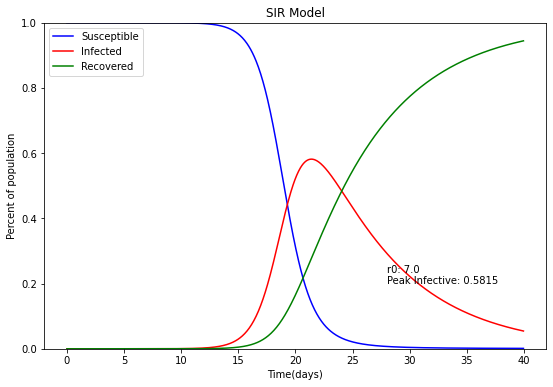

In [2]:
#   b  k   i0          time
SIR(1, 1/7, 0.0000001, 40)

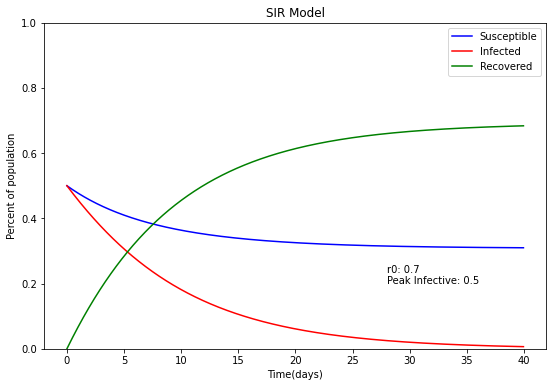

In [3]:
#   b     k    i0   time
SIR(1/10, 1/7, 0.5, 40)

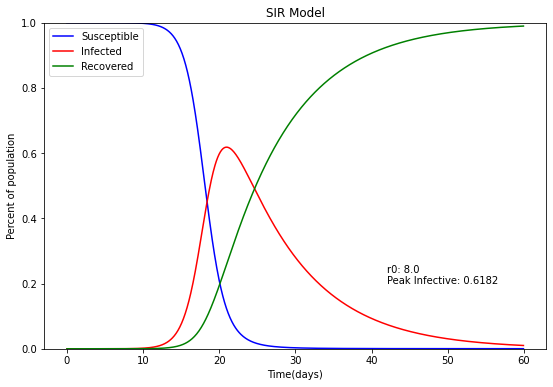

In [4]:
# Using US data. 
SIR(8/9, 1/9, 10/(3.6*(12**6)), 60)

## SEIR(S)Model  
The SEIR model takes into account the latency period of being infectious by including an exposed section.This is a useful addition when considering the coronavirus due to it have a long latency period compared to most other diseases. 
* $E(x)$ = the exposed but not yet infectious population
* $\sigma$ = the rate exposed people become infectious  
This leads us to a new set of equations to build our models off of. 
\begin{equation}
\frac{dS}{dt}=-\beta S(t)I(t), \frac{dE}{dt} = \beta S(t) I(t)-\sigma E, , \frac{dI}{dt}= \sigma E - \gamma I(t), \frac{dR}{dt}=\gamma I(t), \frac{dS}{dt}+\frac{dE}{dt}+\frac{dI}{dt}+\frac{dR}{dt}=0
\end{equation}


In [5]:
def SEIR(b, k, s, i0, time):
    # b each infected individual has a fixed number b of contacts per day
    # k of the infected group will recover during any given day. 1/k is days to recover
    # 1/s average duration of incubation
    repRate = b/k  # b/k = contacts per infection > 1 => spread through population
    s0 = 1 - i0  # Under the assumption that everyone who isn't initially infected is susceptible
    r0, e0 = 0, 0
    dT = time / 1000

    plt.rcParams['figure.figsize'] = [9, 6]

    # setting the x - coordinates
    t = np.arange(0, time, dT)
    # setting the corresponding y - coordinates
    S, E, I, R = np.empty(t.__len__()), np.empty(t.__len__()), np.empty(t.__len__()), np.empty(t.__len__())

    i, S[0], E[0], I[0], R[0] = 0, s0, e0, i0, r0
    for num in t:
        if i != 0:
            S[i] = S[i-1] - (b * S[i-1] * I[i-1]) * dT
            E[i] = E[i-1] + (b * S[i-1] * I[i-1] - s * E[i-1]) * dT
            I[i] = I[i-1] + (s * E[i-1] - k * I[i-1]) * dT
            R[i] = 1 - S[i] - E[i] - I[i]
        i += 1

    plt.xlabel("Time(days)")
    plt.ylabel("Percent of population")
    plt.plot(t, S, label="Susceptible", color="blue")
    plt.plot(t, E, label="Exposed", color="orange")
    plt.plot(t, I, label="Infected", color="red")
    plt.plot(t, R, label="Recovered", color="green")
    plt.legend()
    plt.text(0.70 * time, 0.2, "r0: " + str(round(repRate, 4)) + "\nPeak Infective: " + str(round(I.max(), 4)))
    plt.title("SEIR Model")
    plt.ylim(0, 1)
    plt.show()

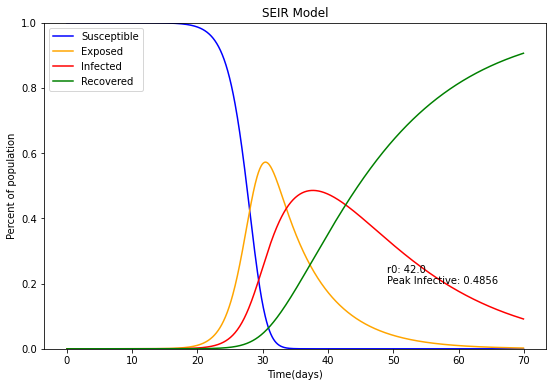

In [6]:
#    b, k,    s,   i0,        time
SEIR(3, 1/14, 1/7, 0.0000001, 70)

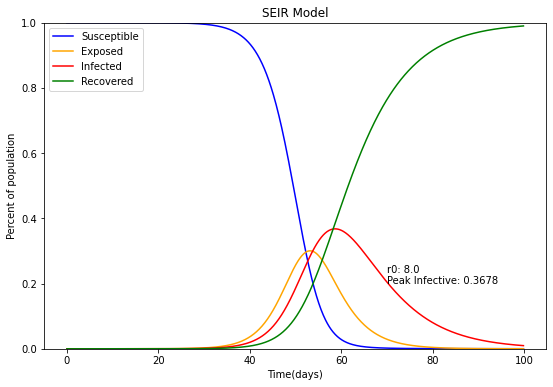

In [7]:
# Using US data. 
SEIR(8/9, 1/9, 1/5, 10/(3.6*(12**6)), 100)

## Vital Dynamics
Many models will include birth and death rates since the incoming birth rates will provide the disease with more potential carriers. To keep it a closed population many models will assume that the birth and death rates cancel out(though in reality births increase more than deaths due to our constant increasing population). This is represented by having another rate flowing from the Recovered category to the Susceptible category. This is more important for diseases being tracked over a long period of time rather than for short term analysis. 
Vital dynamics introduce birth and death rates with: 
* $\mu$ = Birth Rate
* $\nu$ = Death Rate
\begin{equation}
\frac{dS}{dt}=\mu (S+E+I+R)- \nu S - \beta SI, \frac{dE}{dt} = \beta S I-\nu E-\sigma E, , \frac{dI}{dt}= \sigma E - \gamma I-\nu I, \frac{dR}{dt}=\gamma I -\nu R
\end{equation}



In [8]:
def SEIRV(b, k, s, i0, time, mnu):
    # b each infected individual has a fixed number b of contacts per day
    # k of the infected group will recover during any given day. 1/k is days to recover
    # 1/s average duration of incubation
    # mnu is the death and birth rate. It is assumed that they cancel out for the sake of the model
    repRate = b/k  # b/k = contacts per infection > 1 => spread through population
    s0 = 1 - i0  # Under the assumption that everyone who isn't initially infected is susceptible
    r0, e0 = 0, 0
    dT = time / 1000

    plt.rcParams['figure.figsize'] = [9, 6]

    # setting the x - coordinates
    t = np.arange(0, time, dT)
    # setting the corresponding y - coordinates
    S, E, I, R = np.empty(t.__len__()), np.empty(t.__len__()), np.empty(t.__len__()), np.empty(t.__len__())

    i, S[0], E[0], I[0], R[0] = 0, s0, e0, i0, r0
    for num in t:
        if i != 0:
            S[i] = S[i-1] + (mnu - b * S[i-1] * I[i-1] - mnu * S[i-1]) * dT
            E[i] = E[i-1] + (b * S[i-1] * I[i-1] - s * E[i-1]- mnu * E[i-1]) * dT
            I[i] = I[i-1] + (s * E[i-1] - k * I[i-1] - mnu * I[i-1]) * dT
            R[i] = 1 - S[i] - E[i] - I[i]
        i += 1

    plt.xlabel("Time(days)")
    plt.ylabel("Percent of population")
    plt.plot(t, S, label="Susceptible", color="blue")
    plt.plot(t, E, label="Exposed", color="orange")
    plt.plot(t, I, label="Infected", color="red")
    plt.plot(t, R, label="Recovered", color="green")
    plt.legend()
    plt.text(0.70 * time, 0.2, "r0: " + str(round(repRate, 4)) + "\nPeak Infective: " + str(round(I.max(), 4)))
    plt.title("SEIR Model with Vital dynamics")
    plt.ylim(0, 1)
    plt.show()

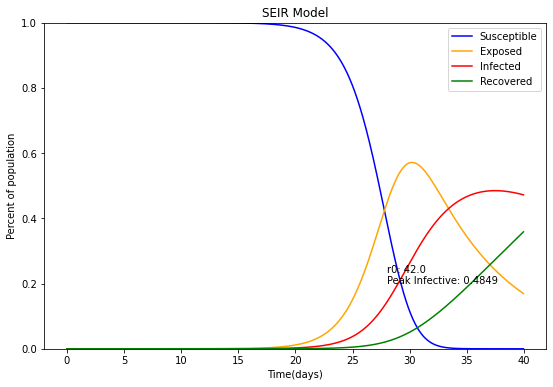

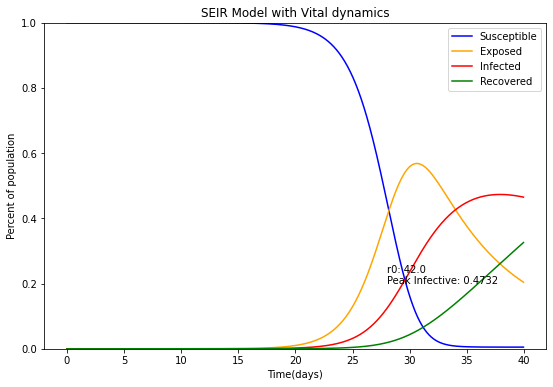

In [9]:
SEIR(3, 1/14, 1/7, 0.0000001, 40)
SEIRV(3, 1/14, 1/7, 0.0000001, 40, 0.0073)

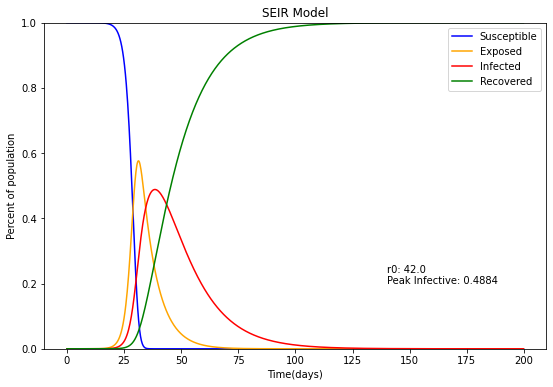

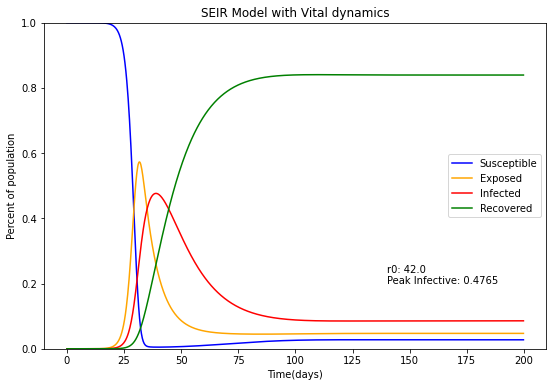

In [10]:
SEIR(3, 1/14, 1/7, 0.0000001, 200)
SEIRV(3, 1/14, 1/7, 0.0000001, 200, 0.0073)

## Splitting Recovered

An issue with the SEIR model when trying to reduce death is the fact that Recovered means people who are no longer spreading the symptoms. This includes death in addition to people who have gotten better. Splitting Recovered into Healed and Deceased categories can help with using the model to help reduce deaths. 
* $\rho$ = death from COVID-19 Rate
* $H(t)$ = people who have healed from COVID-19
* $D(t)$ = People who have died from COVID-19

First off we take the base SEIR model with the following change  
\begin{equation}
R=H+D,\frac{dR}{dt}=\frac{dH}{dt}+\frac{dD}{dt}, \frac{dD}{dt}= \rho I, \frac{dH}{dt}=(1-\rho )\gamma I
\end{equation}  
With this we can then rewrite the original equations but with this substitution
\begin{equation}
\frac{dS}{dt}=-\beta SI, \frac{dE}{dt} = \beta S I-\sigma E, , \frac{dI}{dt}= \sigma E - \gamma I - \rho I, \frac{dD}{dt}= \rho I, \frac{dH}{dt}= \gamma I
\end{equation}

In [11]:
def SEIDH(b, k, s, i0, time, rho):
    # b each infected individual has a fixed number b of contacts per day
    # k of the infected group will recover during any given day. 1/k is days to recover
    # 1/s average duration of incubation
    repRate = b/k  # b/k = contacts per infection > 1 => spread through population
    s0 = 1 - i0  # Under the assumption that everyone who isn't initially infected is susceptible
    d0, e0, h0 = 0, 0, 0
    dT = time / 1000

    plt.rcParams['figure.figsize'] = [9, 6]

    # setting the x - coordinates
    t = np.arange(0, time, dT)
    # setting the corresponding y - coordinates
    S, E, I, D, H = np.empty(t.__len__()), np.empty(t.__len__()), np.empty(t.__len__()), np.empty(t.__len__()), np.empty(t.__len__())

    i, S[0], E[0], I[0], D[0], H[0] = 0, s0, e0, i0, d0, h0
    for num in t:
        if i != 0:
            S[i] = S[i-1] - (b * S[i-1] * I[i-1]) * dT
            E[i] = E[i-1] + (b * S[i-1] * I[i-1] - s * E[i-1]) * dT
            I[i] = I[i-1] + (s * E[i-1] - k * I[i-1] - rho * I[i-1]) * dT
            D[i] = D[i-1] + (rho * I[i-1]) * dT
            H[i] = 1 - S[i] - E[i] - I[i] - D[i]
        i += 1

    plt.xlabel("Time(days)")
    plt.ylabel("Percent of population")
    plt.plot(t, S, label="Susceptible", color="blue")
    plt.plot(t, E, label="Exposed", color="orange")
    plt.plot(t, I, label="Infected", color="red")
    plt.plot(t, D, label="Deceased", color="black")
    plt.plot(t, H, label="Healed", color="green")
    plt.legend()
    plt.text(0.70 * time, 0.2, "r0: " + str(round(repRate, 4)) + "\nPeak Infective: " + str(round(I.max(), 4)) + "\nDeaths: " + str(round(D.max(), 4)))
    plt.title("SEIDH Model")
    plt.ylim(0, 1)
    plt.show()

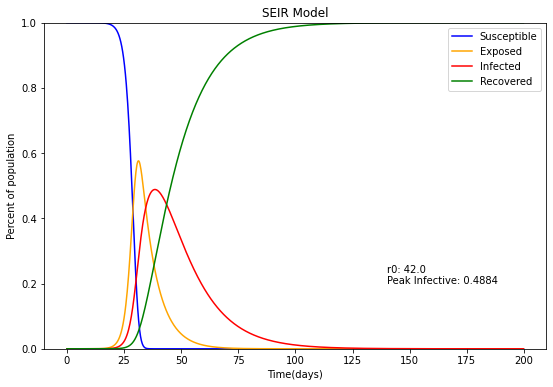

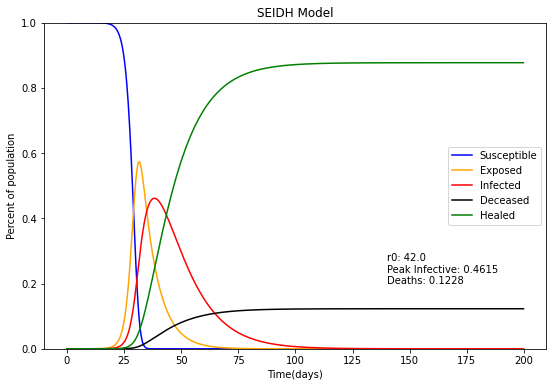

In [12]:
SEIR(3, 1/14, 1/7, 0.0000001, 200)
SEIDH(3, 1/14, 1/7, 0.0000001, 200, 0.01)

## Vaccinations 
* $\alpha$ = Vaccination Immunity Rate
* $V(T)$ = Amount Vaccinated  
\begin{equation}
\frac{dS}{dt}=-\beta SI -\alpha S, \frac{dE}{dt} = \beta S I-\sigma E, , \frac{dI}{dt}= \sigma E - \gamma I - \rho I, \frac{dD}{dt}= \rho I, \frac{dH}{dt}= \gamma I, \frac{dV}{dt}=\alpha S
\end{equation}
This version of the model will combine vaccinated with the healed population under the name Immune

In [13]:
def SEIDHV(b, k, s, i0, time, rho, a):
    # b each infected individual has a fixed number b of contacts per day
    # k of the infected group will recover during any given day. 1/k is days to recover
    # 1/s average duration of incubation
    # a(alpha) is the death rate of COVID-19
    repRate = b/k  # b/k = contacts per infection > 1 => spread through population
    s0 = 1 - i0  # Under the assumption that everyone who isn't initially infected is susceptible
    d0, e0, h0 = 0, 0, 0
    dT = time / 1000

    plt.rcParams['figure.figsize'] = [9, 6]

    # setting the x - coordinates
    t = np.arange(0, time, dT)
    # setting the corresponding y - coordinates
    S, E, I, D, H = np.empty(t.__len__()), np.empty(t.__len__()), np.empty(t.__len__()), np.empty(t.__len__()), np.empty(t.__len__())

    i, S[0], E[0], I[0], D[0], H[0] = 0, s0, e0, i0, d0, h0
    for num in t:
        if i != 0:
            S[i] = S[i-1] + ((-1 * b) * S[i-1] * I[i-1] - a * S[i-1]) * dT
            E[i] = E[i-1] + (b * S[i-1] * I[i-1] - s * E[i-1]) * dT
            I[i] = I[i-1] + (s * E[i-1] - k * I[i-1] - rho * I[i-1]) * dT
            D[i] = D[i-1] + (rho * I[i-1]) * dT
            H[i] = 1 - S[i] - E[i] - I[i] - D[i]
        i += 1

    plt.xlabel("Time(days)")
    plt.ylabel("Percent of population")
    plt.plot(t, S, label="Susceptible", color="blue")
    plt.plot(t, E, label="Exposed", color="orange")
    plt.plot(t, I, label="Infected", color="red")
    plt.plot(t, D, label="Deceased", color="black")
    plt.plot(t, H, label="Immune", color="green")
    plt.legend()
    plt.text(0.70 * time, 0.2, "r0: " + str(round(repRate, 4)) + "\nPeak Infective: " + str(round(I.max(), 4)) + "\nDeaths: " + str(round(D.max(), 4)))
    plt.title("SEIDH Model with Vaccinations")
    plt.ylim(0, 1)
    plt.show()

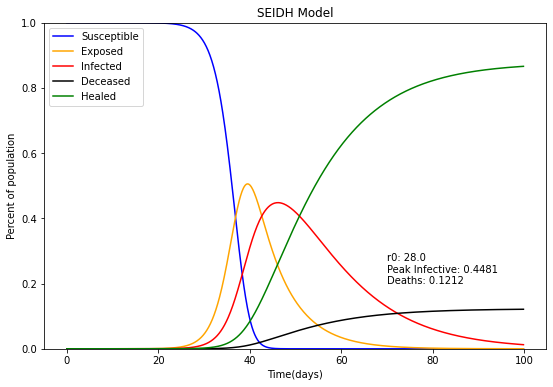

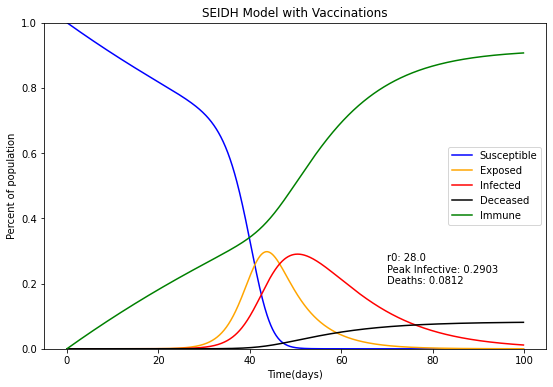

In [14]:
SEIDH(2, 1/14, 1/7, 0.0000001, 100, 0.01)
SEIDHV(2, 1/14, 1/7, 0.0000001, 100, 0.01, 0.01)

## Age Structured Compartmental SEIDH Model With Vaccinations  
* $n$ = number of age brackets
* $R_{n}$ = 